<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

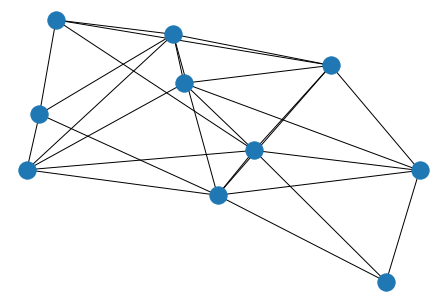

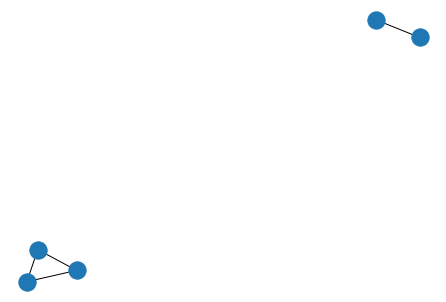

In [1]:
#Erdos-Renyi Graph in Networkx
import random
from networkx import nx
import matplotlib.pyplot as plt

N = 10  # 10 nodes
K = 100  # 100 agents
#M = 30  # 30 edges
NN = 5


#Graph = nx.gnm_random_graph(N, M)

P = 0.5 #Probabibilty for Node Connection in random graph
PP = 0.5
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 1 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 1 1]
 [1 0 0 1 0 1 1 1 1 1]
 [1 0 1 0 0 1 1 0 1 0]
 [0 1 0 0 0 1 1 1 1 1]
 [0 0 1 1 1 0 1 0 0 1]
 [0 0 1 1 1 1 0 1 1 0]
 [0 1 1 0 1 0 1 0 0 0]
 [1 1 1 1 1 0 1 0 0 1]
 [0 1 1 0 1 1 0 0 1 0]]
[[0 1 0 0 1]
 [1 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [1 1 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
print(Node)
print(len(Node))


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: []}
50


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_Index=random.uniform(0,1)
    Node[i*NN+j].append({'Virus' : Viral_Index})
print(Node)
print(len(Node))


{0: [{'Virus': 0.903271667499726}], 1: [{'Virus': 0.817895831369575}], 2: [{'Virus': 0.6348178928092124}], 3: [{'Virus': 0.7053379009799557}], 4: [{'Virus': 0.9507550995989391}], 5: [{'Virus': 0.36500058125869217}], 6: [{'Virus': 0.6624641591803011}], 7: [{'Virus': 0.5429673005745767}], 8: [{'Virus': 0.7902705344990236}], 9: [{'Virus': 0.944339645612108}], 10: [{'Virus': 0.5809757561329548}], 11: [{'Virus': 0.813995729034616}], 12: [{'Virus': 0.10851629337437729}], 13: [{'Virus': 0.4117287661346668}], 14: [{'Virus': 0.07458897725433788}], 15: [{'Virus': 0.08657365466727496}], 16: [{'Virus': 0.23959988226840634}], 17: [{'Virus': 0.6847371747759504}], 18: [{'Virus': 0.6698749326259229}], 19: [{'Virus': 0.3278594017973254}], 20: [{'Virus': 0.17340468797317976}], 21: [{'Virus': 0.38411353632989964}], 22: [{'Virus': 0.15000392936545492}], 23: [{'Virus': 0.9581578661118278}], 24: [{'Virus': 0.17502313195027908}], 25: [{'Virus': 0.8314517068673468}], 26: [{'Virus': 0.8486706663235136}], 27: [

In [5]:
#Initailizing randomly infection state [0 shows Recovered, 1 shows Susceptible, and 2 shows Infected]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Rand_nodeN=random.randint(0,NN-1)
  Rand_state=random.randint(0,2)
  Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  Agent[k].append({'state' : Rand_state})
  Agent[k].append({'current_node' : Rand_node})
  Agent[k].append({'current_nodeN' : Rand_nodeN})
  Neighbors = list(Graph.neighbors(Rand_node))
  NeighborsN = list(GraphN.neighbors(Rand_nodeN))
  if len(Neighbors) > 0:
    first_node = random.choice(Neighbors)
  else:
    first_node = Rand_node
  if len(Neighbors) > 0:
    Neighbors.remove(first_node)
  if len(Neighbors) > 0:
    second_node = random.choice(Neighbors)
  else:
    second_node = Rand_node
  if len(NeighborsN) > 0:
    first_nodeN = random.choice(NeighborsN)
    second_nodeN = random.choice(NeighborsN)
  else:
    first_nodeN = Rand_nodeN
    second_nodeN = Rand_nodeN

  Agent[k].append({'first_node' : first_node})
  Agent[k].append({'first_nodeN' : first_nodeN})
  Agent[k].append({'second_node' : second_node})
  Agent[k].append({'second_nodeN' : second_nodeN})
print(Node)
print(Agent)

{0: [{'Virus': 0.903271667499726}, {10: 2}, {38: 0}, {61: 2}], 1: [{'Virus': 0.817895831369575}, {50: 1}], 2: [{'Virus': 0.6348178928092124}, {62: 0}, {95: 0}], 3: [{'Virus': 0.7053379009799557}], 4: [{'Virus': 0.9507550995989391}, {67: 2}], 5: [{'Virus': 0.36500058125869217}, {58: 2}, {78: 2}], 6: [{'Virus': 0.6624641591803011}, {25: 0}, {37: 1}], 7: [{'Virus': 0.5429673005745767}, {11: 0}, {21: 2}, {33: 2}, {54: 0}], 8: [{'Virus': 0.7902705344990236}, {47: 1}, {86: 2}], 9: [{'Virus': 0.944339645612108}, {94: 2}], 10: [{'Virus': 0.5809757561329548}, {68: 0}, {93: 0}], 11: [{'Virus': 0.813995729034616}, {16: 0}, {18: 2}, {39: 0}, {41: 2}, {98: 2}], 12: [{'Virus': 0.10851629337437729}, {49: 1}, {82: 0}, {85: 0}, {88: 1}], 13: [{'Virus': 0.4117287661346668}, {7: 2}, {12: 1}, {77: 1}], 14: [{'Virus': 0.07458897725433788}, {5: 1}, {36: 0}, {46: 0}, {63: 2}, {65: 1}], 15: [{'Virus': 0.08657365466727496}, {0: 0}], 16: [{'Virus': 0.23959988226840634}], 17: [{'Virus': 0.6847371747759504}, {8: 

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

10
5


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append(Node[i*len(GraphN.nodes)+j][0])
    count_nomove=0
    count_move=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(1,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent[a_id][1]['current_node'])
                  if Agent[a_id][3]['first_node'] in Graph.neighbors(Agent[a_id][1]['current_node']):
                    neighbors.append(Agent[a_id][3]['first_node'])
                  if Agent[a_id][5]['second_node'] in Graph.neighbors(Agent[a_id][1]['current_node']) :
                    neighbors.append(Agent[a_id][5]['second_node'])
                  #print(neighbors)
                  if len(neighbors) > 0:
                      next = random.choice(neighbors)
                      if next == Agent[a_id][1]['current_node']:
                        #print("no movement")
                        count_nomove+=1
                      elif next == Agent[a_id][3]['first_node']:
                        Agent[a_id][1]['current_node'],Agent[a_id][3]['first_node'] = Agent[a_id][3]['first_node'],Agent[a_id][1]['current_node']
                        Agent[a_id][2]['current_nodeN'],Agent[a_id][4]['first_nodeN'] = Agent[a_id][4]['first_nodeN'],Agent[a_id][2]['current_nodeN']
                        count_move+=1
                      else:
                        Agent[a_id][1]['current_node'],Agent[a_id][5]['second_node'] = Agent[a_id][5]['second_node'],Agent[a_id][1]['current_node']
                        Agent[a_id][2]['current_nodeN'],Agent[a_id][6]['second_nodeN'] = Agent[a_id][6]['second_nodeN'],Agent[a_id][2]['current_nodeN']
                        count_move+=1
                        
                      nextn = Agent[a_id][2]['current_nodeN']
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(Node[cur][agent])
          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    print("count_no_movements",count_nomove)
    print("count_movements",count_move)
    return Node,Node_next

In [8]:
Node_n=Node.copy() 
for i in range(10):
  Node_p,Node_n = random_walk(Graph,GraphN,Node_n,1,1) 
  count=0
  for i in range(len(Node_p)):
    count+=len(Node_p[i]) - 1
  print(count)
  print(Node_p)
  print(Node_n)


count_no_movements 33
count_movements 67
100
{0: [{'Virus': 0.903271667499726}, {10: 2}, {38: 0}, {61: 2}], 1: [{'Virus': 0.817895831369575}, {50: 1}], 2: [{'Virus': 0.6348178928092124}, {62: 0}, {95: 0}], 3: [{'Virus': 0.7053379009799557}], 4: [{'Virus': 0.9507550995989391}, {67: 2}], 5: [{'Virus': 0.36500058125869217}, {58: 2}, {78: 2}], 6: [{'Virus': 0.6624641591803011}, {25: 0}, {37: 1}], 7: [{'Virus': 0.5429673005745767}, {11: 0}, {21: 2}, {33: 2}, {54: 0}], 8: [{'Virus': 0.7902705344990236}, {47: 1}, {86: 2}], 9: [{'Virus': 0.944339645612108}, {94: 2}], 10: [{'Virus': 0.5809757561329548}, {68: 0}, {93: 0}], 11: [{'Virus': 0.813995729034616}, {16: 0}, {18: 2}, {39: 0}, {41: 2}, {98: 2}], 12: [{'Virus': 0.10851629337437729}, {49: 1}, {82: 0}, {85: 0}, {88: 1}], 13: [{'Virus': 0.4117287661346668}, {7: 2}, {12: 1}, {77: 1}], 14: [{'Virus': 0.07458897725433788}, {5: 1}, {36: 0}, {46: 0}, {63: 2}, {65: 1}], 15: [{'Virus': 0.08657365466727496}, {0: 0}], 16: [{'Virus': 0.2395998822684063